In [1]:
import pandas as pd
import joblib
import datetime

In [2]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

In [4]:
df = pd.read_pickle('data/df_result.pkl')

In [5]:
df

,target_action,visit_number_std,dist_to_msk_std,pixels_std,screen_aspect_std,utm_source_BHcvLfOaCWvWTykYqHVe,utm_source_BKeImrJuRDZcHiSSTdzm,utm_source_DlnuGwaJBHGNEKdWfOpe,utm_source_DnEUulZAecfGPvdtZBYS,utm_source_FTAuYVNoYYxgvKMpKSLW,...,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday,daytime_afternoon,daytime_evening,daytime_morning,daytime_night
0,0,-0.26012,0.182531,-0.711961,0.357344,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0,-0.26012,-0.439447,-0.378943,0.671263,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,-0.26012,1.119588,-0.711961,0.357344,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0,-0.26012,-0.439447,-0.466333,0.357344,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,-0.02238,-0.439447,-0.466333,0.357344,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860037,0,-0.26012,-0.439447,2.199873,-1.840084,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1860038,0,-0.26012,-0.113202,-0.377368,0.671263,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1860039,0,-0.26012,-0.439447,-0.761866,0.043426,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1860040,0,-0.26012,0.232705,-0.355072,0.671263,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [6]:
# разделите выборку на треин и тест в отношении 70/30
train_x, test_x, train_y, test_y = train_test_split(
    df.drop(columns='target_action'), 
    df['target_action'], 
    test_size=0.3, 
    random_state=42)

In [6]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(train_x, train_y)

DecisionTreeClassifier(random_state=42)

In [7]:
pred_tr = tree.predict(test_x)
pred_tr

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [8]:
accuracy_score(test_y, pred_tr)

0.9506469035177091

In [9]:
confusion_matrix(test_y, pred_tr)

array([[173378,   4144],
       [  4866,    174]], dtype=int64)

In [10]:
print(*sorted(list(zip(tree.feature_names_in_, tree.feature_importances_)),
              key=lambda x: abs(x[1]),
              reverse=True
             )[:10], sep='\n')

('screen_aspect_std', 0.0935180251227723)
('visit_number_std', 0.06234581410230511)
('resolution_cat_std', 0.061103906724242436)
('daytime_afternoon', 0.04964865890087836)
('daytime_evening', 0.0426104850161055)
('dayofweek_Tuesday', 0.0364288281140642)
('daytime_morning', 0.03503494601769444)
('dayofweek_Wednesday', 0.03202879039536573)
('dayofweek_Sunday', 0.03048151545683195)
('dayofweek_Friday', 0.02806859002694732)


In [11]:
roc_auc_score(test_y, tree.predict_proba(test_x)[:, 1])

0.515088546816375

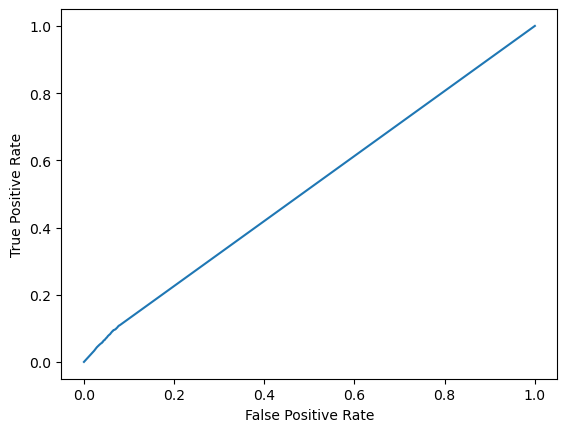

In [12]:
y_score = tree.predict_proba(test_x)[:, 1]

fpr, tpr, _ = roc_curve(test_y, y_score, pos_label=tree.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

# Случайный лес

In [7]:
forest = RandomForestClassifier(random_state=42)
forest.fit(train_x, train_y)

RandomForestClassifier(random_state=42)

In [8]:
pred_rf = forest.predict(test_x)
pred_rf

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [9]:
confusion_matrix(test_y, pred_rf)

array([[503046,   1629],
       [ 14806,    188]], dtype=int64)

In [10]:
print('roc_auc_score для случайного леса:\n', roc_auc_score(test_y, forest.predict_proba(test_x)[:, 1]))

roc_auc_score для случайного леса:
 0.6139738621295185


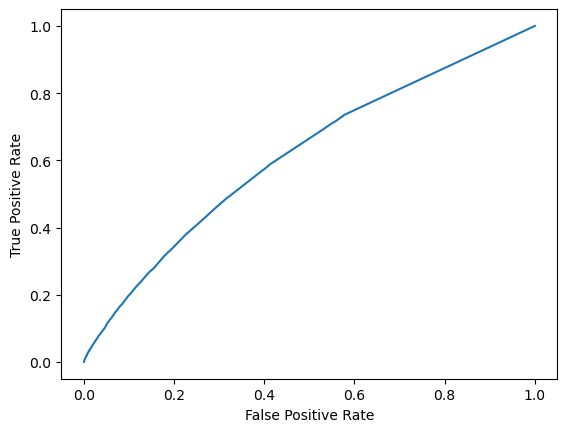

In [12]:
y_score = forest.predict_proba(test_x)[:, 1]

fpr, tpr, _ = roc_curve(test_y, y_score)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

# Логистическая регрессия

In [13]:
logreg = LogisticRegression(max_iter=2000, random_state=42)
logreg.fit(train_x, train_y)

LogisticRegression(max_iter=2000, random_state=42)

In [14]:
pred_lr = logreg.predict(test_x)
pred_lr

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [15]:
confusion_matrix(test_y, pred_lr)

array([[504672,      3],
       [ 14992,      2]], dtype=int64)

In [16]:
print('roc_auc_score для логистической регрессии:\n', roc_auc_score(test_y, logreg.decision_function(test_x)))

roc_auc_score для логистической регрессии:
 0.6698707588251529


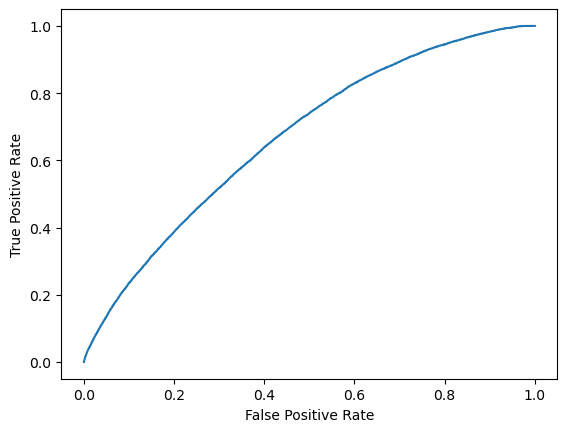

In [17]:
y_score = logreg.decision_function(test_x)

fpr, tpr, _ = roc_curve(test_y, y_score)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [22]:
mlp = MLPClassifier(hidden_layer_sizes=[128, 64], max_iter=800, random_state=42)
mlp.fit(train_x, train_y)

MLPClassifier(hidden_layer_sizes=[128, 64], max_iter=800, random_state=42)

In [23]:
pred_mlp = mlp.predict(test_x)
pred_mlp

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [24]:
confusion_matrix(test_y, pred_mlp)

array([[504664,     11],
       [ 14994,      0]], dtype=int64)

In [25]:
roc_auc_score(test_y, mlp.predict_proba(test_x)[:, 1])

0.64777784378724

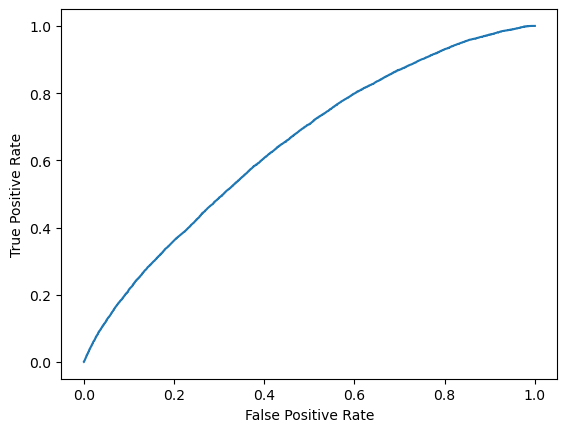

In [26]:
y_score = mlp.predict_proba(test_x)[:, 1]

fpr, tpr, _ = roc_curve(test_y, y_score, pos_label=mlp.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [27]:
knc = KNeighborsClassifier()
knc.fit(train_x, train_y)

KNeighborsClassifier()

In [28]:
pred_knc = knc.predict(test_x)
pred_knc

KeyboardInterrupt: 

In [ ]:
confusion_matrix(test_y, pred_knc)

In [ ]:
roc_auc_score(test_y, knc.predict_proba(test_x)[:, 1])

In [72]:
df2 = pd.read_pickle('data/df_noencode.pkl')

In [31]:
df2.shape

(1141010, 14)

In [32]:
df2['screen_aspect'] = df2['screen_aspect'].astype('str')

In [33]:
df2.dtypes

visit_number        int64
utm_source         object
utm_medium         object
utm_campaign       object
utm_adcontent      object
device_category    object
device_brand       object
device_browser     object
geo_city           object
target_action       int64
dayofweek          object
daytime            object
resolution_cat     object
screen_aspect      object
dtype: object

In [47]:
js = {
    "tokenizers" : [{
        "tokenizer_id" : "Space",
        "separator_type" : "ByDelimiter",
        "delimiter" : " "
    }],

    "dictionaries" : [{
        "dictionary_id" : "BiGram",
        "max_dictionary_size" : "50000",
        "occurrence_lower_bound" : "0",
        "gram_order" : "2"
    }, {
        "dictionary_id" : "Word",
        "max_dictionary_size" : "50000",
        "occurrence_lower_bound" : "0",
        "gram_order" : "1"
    }],

    "feature_processing" : {
        "default" : [{
            "dictionaries_names" : ["BiGram", "Word"],
            "feature_calcers" : ["BoW"],
            "tokenizers_names" : ["Space"]
        }, {
            "dictionaries_names" : ["Word"],
            "feature_calcers" : ["NaiveBayes"],
            "tokenizers_names" : ["Space"]
        }],
    }
}

In [48]:
cat = CatBoostClassifier(text_processing=js)
cat.fit(
    df2.drop(columns='target_action'),
    df2[['target_action']],
    cat_features=['utm_source', 'utm_medium', 'utm_campaign', 'utm_adcontent', 
                  'device_category', 'device_brand', 'device_browser', 'geo_city', 
                  'dayofweek', 'daytime', 'resolution_cat'],
    text_features=['screen_aspect'],
    verbose=False
)

CatBoostError: C:/Program Files (x86)/Go Agent/pipelines/BuildMaster/catboost.git/catboost/private/libs/feature_estimator/text_feature_estimators.cpp:89: Dictionary size is 0, check out data or try to decrease occurrence_lower_bound parameter

In [62]:
ada = AdaBoostClassifier(base_estimator=logreg, n_estimators=100, random_state=42)
ada.fit(train_x, train_y)

AdaBoostClassifier(base_estimator=LogisticRegression(max_iter=900,
                                                     random_state=42),
                   n_estimators=100, random_state=42)

In [63]:
pred_ada = ada.predict(test_x)
pred_ada

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [64]:
confusion_matrix(test_y, pred_ada)

array([[66601,     0],
       [ 1860,     0]], dtype=int64)

In [65]:
roc_auc_score(test_y, ada.decision_function(test_x))

0.6422256123894939

# HistGradientBoosting

In [19]:
hgb = HistGradientBoostingClassifier(random_state=42)
hgb.fit(train_x, train_y)

HistGradientBoostingClassifier(random_state=42)

In [20]:
pred_hgb = hgb.predict(test_x)
pred_hgb

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [21]:
confusion_matrix(test_y, pred_hgb)

array([[504667,      8],
       [ 14978,     16]], dtype=int64)

In [23]:
print('roc_auc_score для HGBoosting:\n', roc_auc_score(test_y, hgb.decision_function(test_x)))

roc_auc_score для HGBoosting:
 0.6918082267335032


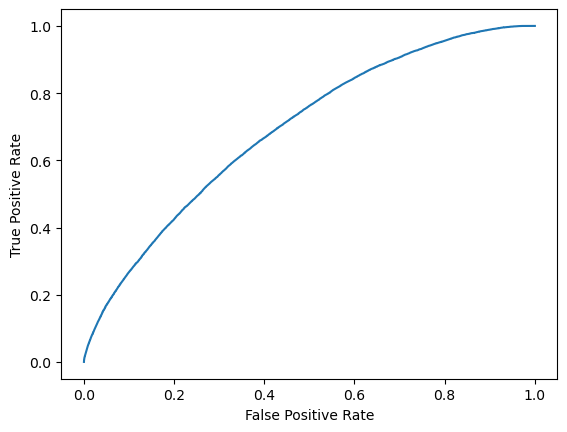

In [24]:
y_score = hgb.decision_function(test_x)

fpr, tpr, _ = roc_curve(test_y, y_score)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

# HistGradientBoosting (tuning)

In [25]:
hgb = HistGradientBoostingClassifier(l2_regularization=1.0, class_weight={0: 1, 1:5}, random_state=42)
hgb.fit(train_x, train_y)

HistGradientBoostingClassifier(class_weight={0: 1, 1: 5}, l2_regularization=1.0,
                               random_state=42)

In [26]:
pred_hgb = hgb.predict(test_x)
pred_hgb

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [27]:
confusion_matrix(test_y, pred_hgb)

array([[504448,    227],
       [ 14878,    116]], dtype=int64)

In [28]:
print('roc_auc_score для HGBoosting (тюнинг):\n', roc_auc_score(test_y, hgb.decision_function(test_x)))

roc_auc_score для HGBoosting (тюнинг):
 0.6932100899011212


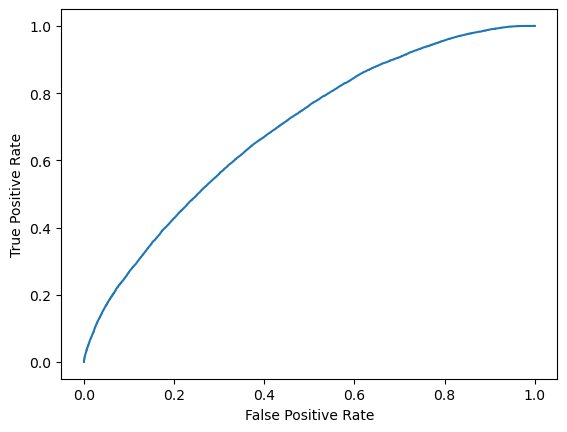

In [29]:
y_score = hgb.decision_function(test_x)

fpr, tpr, _ = roc_curve(test_y, y_score)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

# Выводы

Лучше всего показала себя модель HistGradientBoosting, c метрикой roc-auc 0.6932

Посколько специфика задачи такова, что доля 1 в целевом действии крайне мала, в целях увеличения количества действительноположительных предсказаний, будем использовать пороговое значение для сигмоиды, отличное от 0.5, при этом будет расти и доля ложнопложительных предсказаний

In [30]:
# Определим оптимальное значение порога сигмоиды 
# по оптимальному соотношению True Positive и Fasle Positive

In [31]:
def tprfpr(confm):
    tn = confm[0,0]
    fp = confm[0,1]
    fn = confm[1,0]
    tp = confm[1,1]
    return tp / (fn + tp),  fp / (tn + fp)

In [33]:
def predict_custom(pred_probs, trsh=0.5):
    return [(0 if p1 < trsh else 1) for p0, p1 in pred_probs]

In [34]:
def optimal_treshold(classif):
    """finds optimal trashold value for prediction"""
    pred_proba = classif.predict_proba(test_x)

    a, b = 0, 1
    while abs(a - b) > 1e-3:
        m = (a + b) / 2
        rate = lambda p: float.__sub__(*tprfpr(confusion_matrix(test_y, p)))
        yl = rate(predict_custom(pred_proba, trsh=(a+m)/2)), (a+m)/2
        yr = rate(predict_custom(pred_proba, trsh=(m+b)/2)), (m+b)/2
        if yl[0] > yr[0]:
            b = m
        else:
            a = m
    return max([yl, yr])[1]

print(f"Оптимальное пороговое значение: {optimal_treshold(hgb)}")

Оптимальное пороговое значение: 0.13818359375


In [35]:
# Посмотрим матрицу ошибок для данного значения

In [36]:
pred_hgb2 = predict_custom(hgb.predict_proba(test_x), trsh=0.13818359375)

In [37]:
confusion_matrix(test_y, pred_hgb2)

array([[314252, 190423],
       [  5259,   9735]], dtype=int64)

In [38]:
# Обучим модель на всём датасете, также добавим тюнинг модели

In [39]:
hgb_final = HistGradientBoostingClassifier(l2_regularization=1.0, class_weight={0: 1, 1:5}, random_state=42)
hgb_final.fit(
    df.drop(columns='target_action'),
    df['target_action']
)

HistGradientBoostingClassifier(class_weight={0: 1, 1: 5}, l2_regularization=1.0,
                               random_state=42)

In [40]:
print('roc_auc_score для HGBoosting (весь датасет):\n', roc_auc_score(test_y, hgb_final.decision_function(test_x)))

roc_auc_score для HGBoosting (весь датасет):
 0.7051135798517819


In [41]:
confusion_matrix(test_y, hgb_final.predict(test_x))

array([[504471,    204],
       [ 14875,    119]], dtype=int64)

In [42]:
# Сохраним в pickle

In [44]:
now = datetime.datetime.now()

joblib.dump({
    'model': hgb_final,
    'author': 'Arseniy Kubanov',
    'classifier': 'HistGradientBoosting',
    'version': 1.1,
    'date': now.isoformat(),
    'roc_auc_test': roc_auc_score(test_y, hgb.decision_function(test_x)),
    'optimal_trsh': optimal_treshold(hgb)
},
    f"model/hist_{now.strftime('%y%m%d-%H%M%S')}.pkl"
)

['model/hist_230408-161732.pkl']